In [1]:
# scatter plot of eact
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy, math
import seaborn as sns


In [19]:
# load the data
employee_data = pd.read_csv("train.csv")

# # print the first 5 rows
# print(employee_data.head())
# # print headers
print(employee_data.columns)


print(employee_data.isna().sum())


# print(employee_data.shape)
# # get only 1.000 rows
# employee_data = employee_data[:1000]
# print(employee_data.shape)

# convert Transported column to False/True to 0 and 1 values
employee_data['Transported'] = employee_data['Transported'].astype(int)

print(employee_data[:5])

dataColumns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported']


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Na

/var/folders/4z/bczmdl8d7v30zxcfstg55y840000gn/T/ipykernel_54064/3398278559.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = employee_data.corr()


<Axes: >

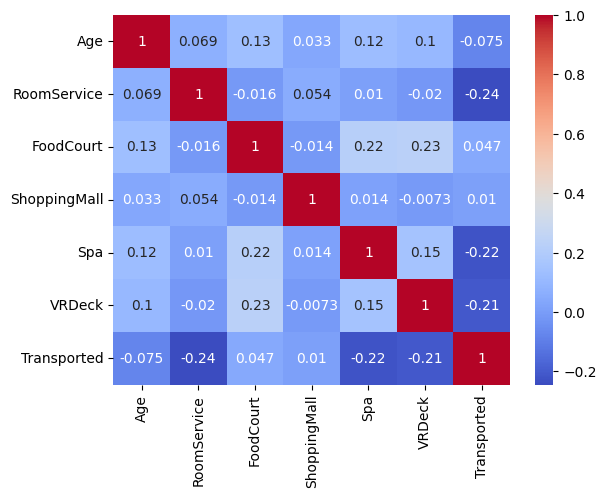

In [18]:


# Load the dataset
employee_data = pd.read_csv('train.csv')

# Calculate the correlation matrix
corr_matrix = employee_data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)


In [20]:
# Selected wanted columns or Disselected unwanted columns #'PassengerId','HomePlanet','CryoSleep','Cabin','Destination', 'VIP', 'Name'
dTrain = employee_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']]
dTest  = employee_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

# filling missing values in Age-RoomService-FoodCourt-ShoppingMall-Spa-VRDeck from the Trainning data.
dTrain['Age'].fillna(dTrain['Age'].mean(), inplace = True)
dTrain['RoomService'].fillna(dTrain['RoomService'].mean(), inplace = True)
dTrain['FoodCourt'].fillna(dTrain['FoodCourt'].mean(), inplace = True)
dTrain['ShoppingMall'].fillna(dTrain['ShoppingMall'].mean(), inplace = True)
dTrain['Spa'].fillna(dTrain['Spa'].mean(), inplace = True)
dTrain['VRDeck'].fillna(dTrain['VRDeck'].mean(), inplace = True)

# # Changing the data type (object) from categorical data in the attribute "Transported" to the data type (numerical).
dTrain['Transported'] = dTrain['Transported'].replace({True: '1', False: '0'})

dTrain.head()


/var/folders/4z/bczmdl8d7v30zxcfstg55y840000gn/T/ipykernel_54064/1904392525.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dTrain['Age'].fillna(dTrain['Age'].mean(), inplace = True)
/var/folders/4z/bczmdl8d7v30zxcfstg55y840000gn/T/ipykernel_54064/1904392525.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dTrain['RoomService'].fillna(dTrain['RoomService'].mean(), inplace = True)
/var/folders/4z/bczmdl8d7v30zxcfstg55y840000gn/T/ipykernel_54064/1904392525.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1


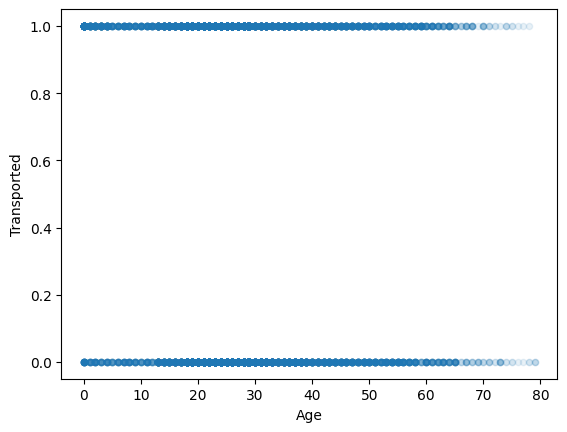

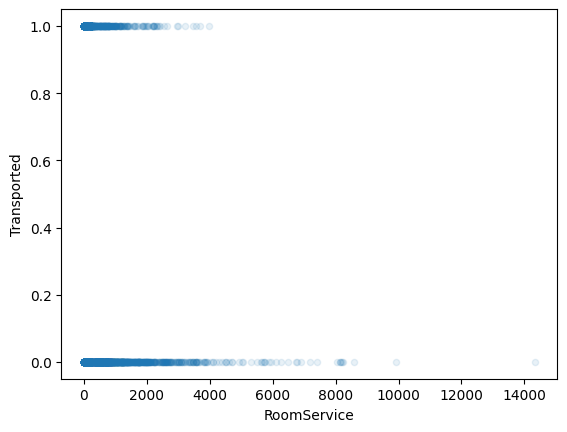

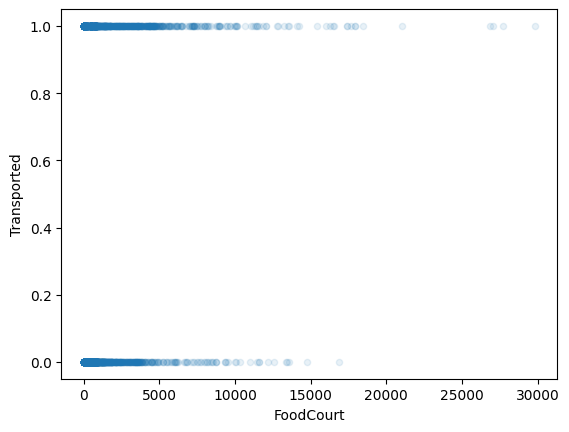

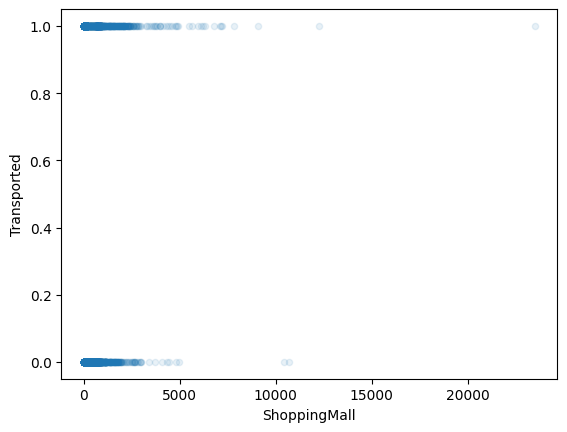

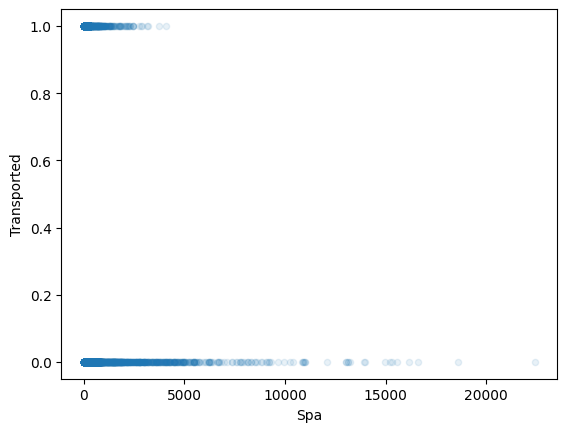

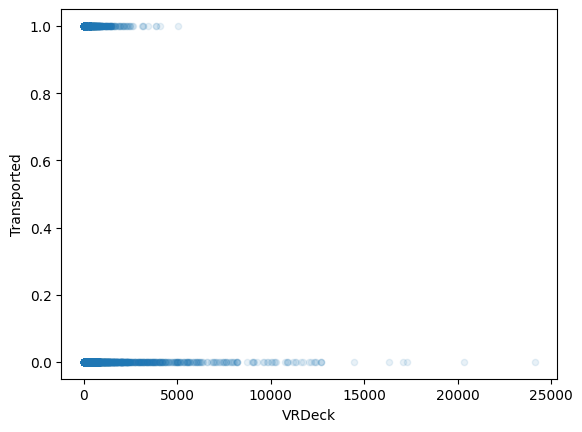

In [21]:
# show a plot of the correlation between every column against Attrition
for column in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']:
    if column != 'Transported':
        dTrain.plot.scatter(x=column, y='Transported', alpha=0.1)